<a href="https://colab.research.google.com/github/thanhduc17/hoc_may_1/blob/main/h%E1%BB%8Dc_c%C3%B3_gi%C3%A1m_s%C3%A1t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


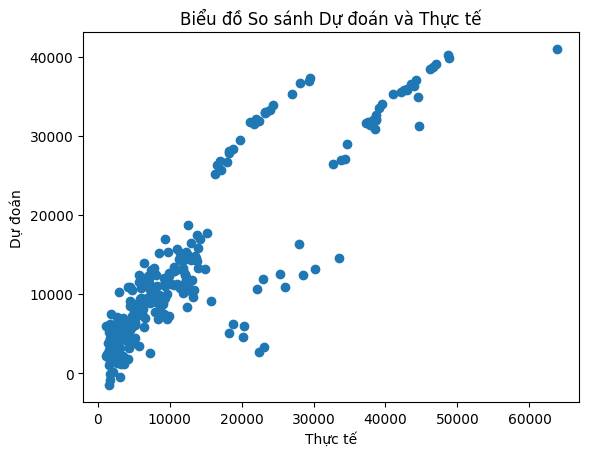

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Xác định các biến độc lập (features) và biến phụ thuộc (target)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
# Chuyển đổi biến categorical thành dạng số học (one-hot encoding)
X = pd.get_dummies(X)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)
# Dự đoán chi phí y tế trên tập kiểm tra
predictions = model.predict(X_test)


import matplotlib.pyplot as plt
import numpy as np

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.scatter(y_test, predictions, alpha=1)
plt.title('Biểu đồ So sánh Dự đoán và Thực tế')
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.show()





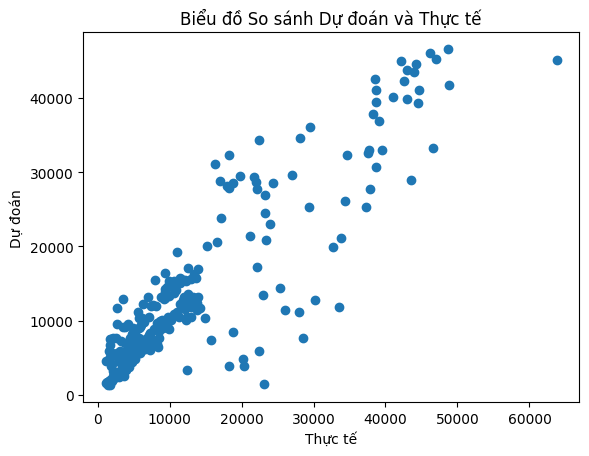

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng và huấn luyện mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test_scaled)

# Vẽ biểu đồ thực tế và dự đoán
plt.scatter(y_test, y_pred, alpha=1)
plt.title('Biểu đồ So sánh Dự đoán và Thực tế')
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.show()



In [6]:
!pip install lazypredict


sự chênh lệch tuyệt đối giữa các giá trị dự đoán và giá trị thực tế: 7763.734595058892


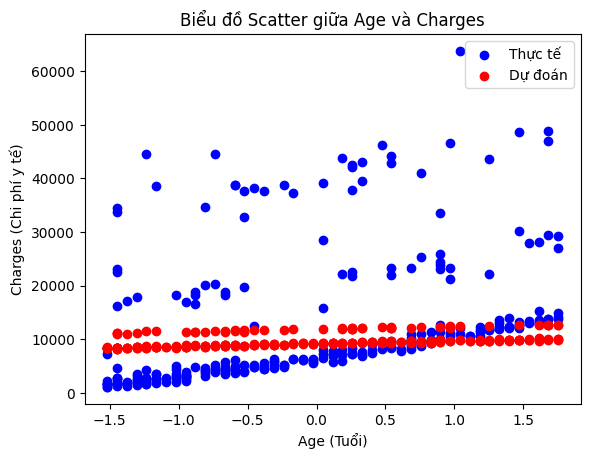

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# X là ma trận chứa các đặc trưng (Age, BMI, Children, Sex, Smoker, Region)
# y là vector chứa biến mục tiêu (Charges)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo mô hình SVM
svm_model = SVR(kernel='linear', C=1.0)

# Huấn luyện mô hình
svm_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print(f'sự chênh lệch tuyệt đối giữa các giá trị dự đoán và giá trị thực tế: {mae}')

import matplotlib.pyplot as plt

# X_test_scaled là ma trận chứa các đặc trưng của tập kiểm tra
# y_test là vector chứa biến mục tiêu (Charges) của tập kiểm tra
# y_pred là vector chứa giá trị dự đoán của mô hình trên tập kiểm tra

# Biểu đồ Scatter plot giữa Age và Charges
plt.scatter(X_test_scaled[:, 0], y_test, label='Thực tế', color='blue')
plt.scatter(X_test_scaled[:, 0], y_pred, label='Dự đoán', color='red')
plt.xlabel('Age (Tuổi)')
plt.ylabel('Charges (Chi phí y tế)')
plt.title('Biểu đồ Scatter giữa Age và Charges')
plt.legend()
plt.show()


In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Đảm bảo rằng các cột đầu vào được chọn đúng
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Chuyển đổi biến phụ thuộc 'Sex' và 'Smoker' thành dạng số
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['smoker'] = X['smoker'].map({'no': 0, 'yes': 1})

# Chuyển đổi biến phụ thuộc 'Region' thành các cột dummies
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Biến phụ thuộc
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LazyRegressor(ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)




100%|██████████| 42/42 [00:05<00:00,  7.90it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
